# Network Traffic Analysis using TDG (Traffic Dispersion Graph)

### Import dependencies

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Function for generating TDG from dataframe

In [39]:
def draw_traffic_dispersion_graph(df):
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph based on source IP, destination IP
    for index, row in df.iterrows():
        source_ip = row['Source IP']
        dest_ip = row['Destination IP']
        G.add_edge(f'{source_ip}', f'{dest_ip}')

    # Calculate in-degree and out-degree for each node
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    # Print top 5 nodes with highest out-degree
    sorted_out_degrees = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)
    print("Top 5 nodes with highest out-degree:")
    for node, out_degree in sorted_out_degrees[:5]:
        print(f"Node: {node}, Out-Degree: {out_degree}")
    
    # Print top 5 nodes with highest in-degree
    sorted_in_degrees = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)
    print("\nTop 5 nodes with highest in-degree:")
    for node, in_degree in sorted_in_degrees[:5]:
        print(f"Node: {node}, In-Degree: {in_degree}")
    

    # Draw the Traffic Dispersion Graph
    plt.figure(figsize=(10, 8))  # Set the figure size
    pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
    nx.draw(G, pos, with_labels=False, node_size=100, node_color='skyblue', arrows=True)
    plt.title('Traffic Dispersion Graph (TDG)')
    plt.axis('off')
    plt.show()

### DDoS attack in 2011 VAST Challenge 2

In [7]:
df = pd.read_csv('Data/test.csv')

# Convert the "Date/time" column to datetime format
df['Date/time'] = pd.to_datetime(df['Date/time'])

outlier_ips = [
    '192.168.2.78',
    '192.168.2.114',
    '192.168.2.126',
    '192.168.2.89',
    '192.168.2.91',
    '192.168.2.148'
]

# Filter the data between 8:52 and 10:30
non_dos_data = df[(df['Date/time'].dt.time >= pd.to_datetime('8:52').time()) & 
                 (df['Date/time'].dt.time <= pd.to_datetime('9:00').time()) & 
                 (df['Destination IP'] != '(empty)') &
                 (~df['Destination IP'].isin(outlier_ips))]

dos_data = df[(df['Date/time'].dt.time >= pd.to_datetime('9:01').time()) &
                 (df['Destination IP'] != '(empty)') ]


### TDG before DDoS started

Top 5 nodes with highest out-degree:
Node: 192.168.1.6, Out-Degree: 116
Node: 192.168.1.2, Out-Degree: 4
Node: 192.168.2.133, Out-Degree: 3
Node: 192.168.2.75, Out-Degree: 3
Node: 192.168.2.64, Out-Degree: 3

Top 5 nodes with highest in-degree:
Node: 192.168.1.2, In-Degree: 112
Node: 192.168.1.6, In-Degree: 111
Node: 192.168.1.14, In-Degree: 65
Node: 192.168.2.141, In-Degree: 3
Node: 192.168.2.11, In-Degree: 2


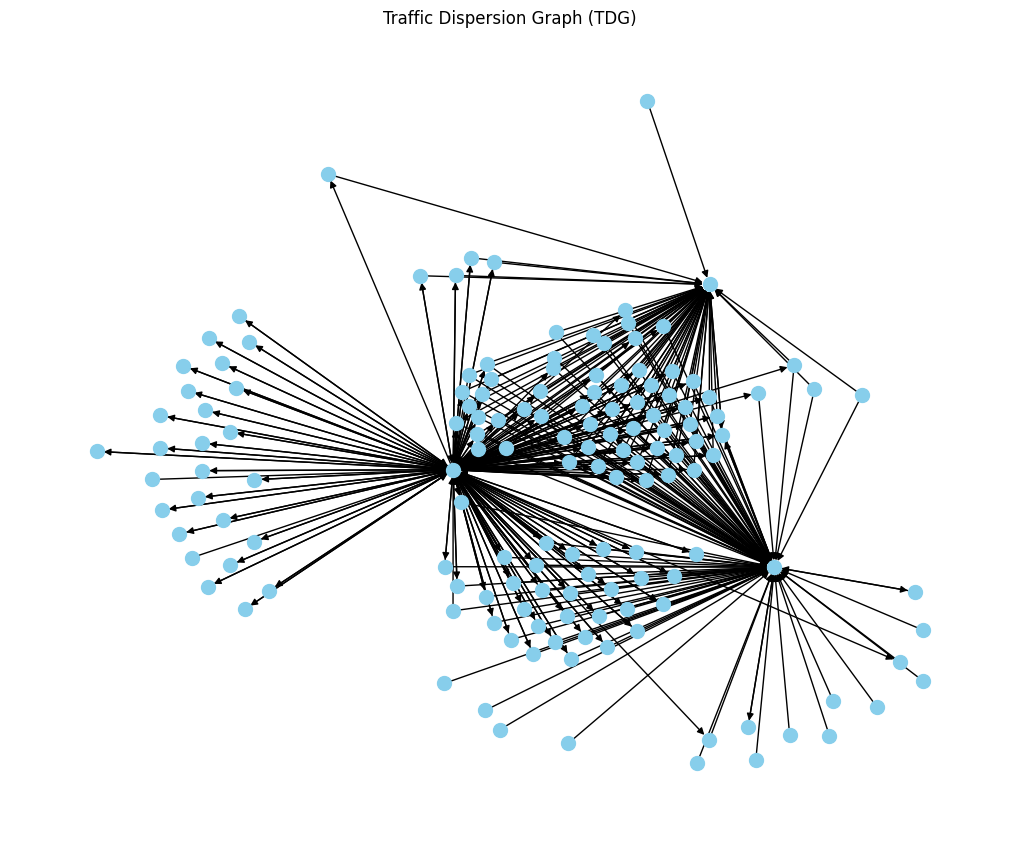

In [40]:
draw_traffic_dispersion_graph(non_dos_data)

### TDG after DDoS initiated

Top 5 nodes with highest out-degree:
Node: 192.168.1.6, Out-Degree: 152
Node: 192.168.1.2, Out-Degree: 131
Node: 192.168.1.14, Out-Degree: 123
Node: 192.168.2.12, Out-Degree: 3
Node: 192.168.2.93, Out-Degree: 3

Top 5 nodes with highest in-degree:
Node: 192.168.1.2, In-Degree: 156
Node: 192.168.1.14, In-Degree: 142
Node: 192.168.1.6, In-Degree: 132
Node: 172.20.1.5, In-Degree: 5
Node: 192.168.2.12, In-Degree: 3


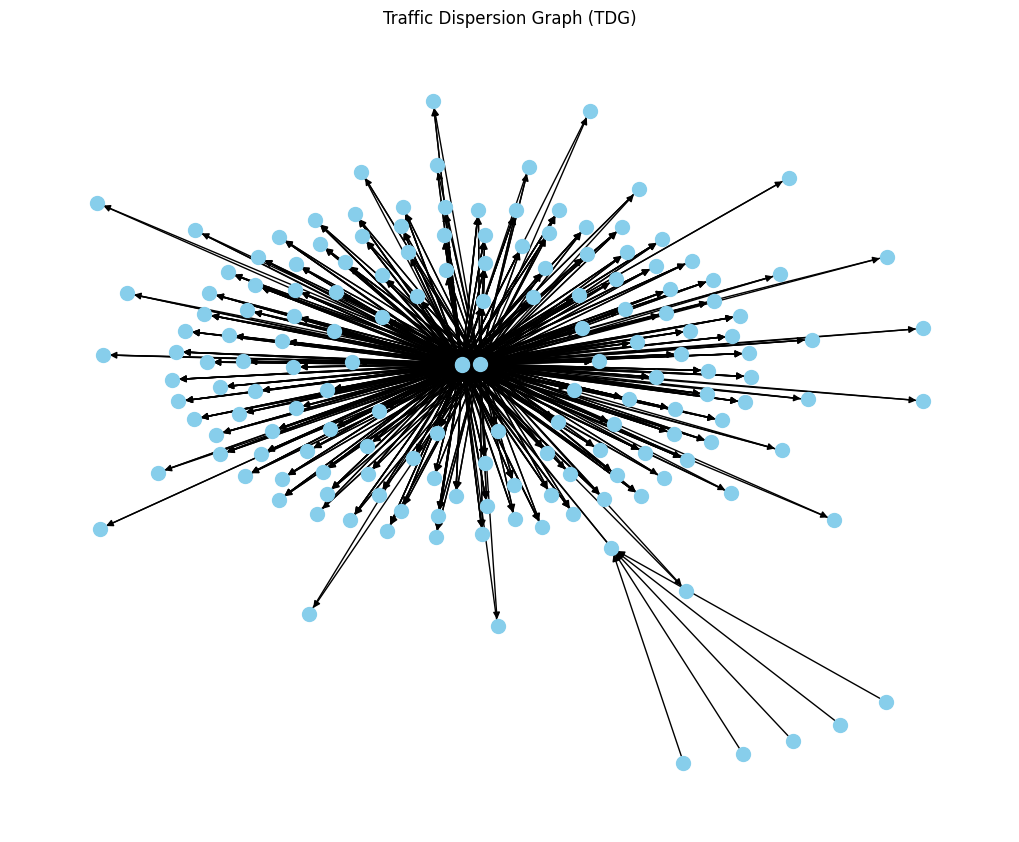

In [41]:
draw_traffic_dispersion_graph(dos_data)

### TDG from custom DDoS Data (Protocol - ICMP)

In [37]:
df = pd.read_csv('Data/DDoS.csv')


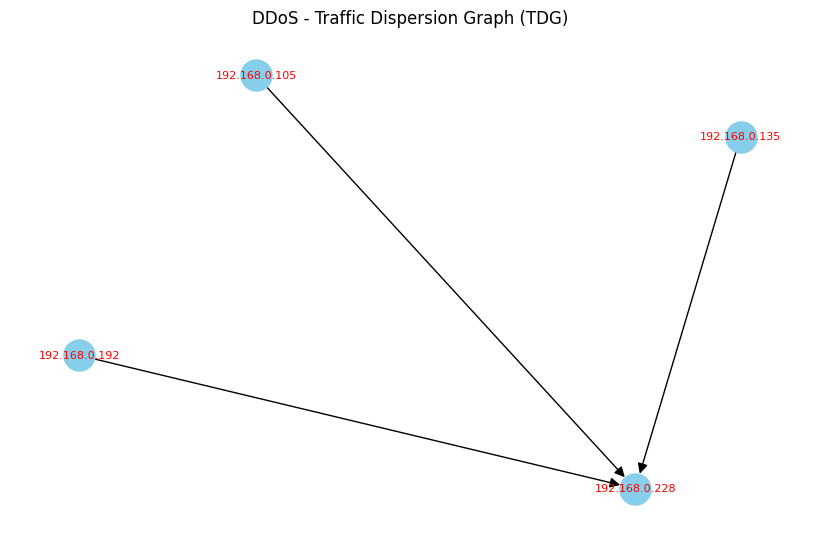

In [38]:
G = nx.DiGraph()

# Add edges to the graph based on source IP, destination IP, source port, and destination port
for index, row in df.iterrows():
    source_ip = row['Destination']
    dest_ip = row['Source']
    G.add_edge(f'{source_ip}', f'{dest_ip}')

plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_color='red', font_size=8,node_size=500, node_color='skyblue', arrows=True, arrowsize=15)
plt.title('DDoS - Traffic Dispersion Graph (TDG)')
plt.axis('off')
plt.show()

### Zoom-call Traffic Analysis (Protocol UDP)

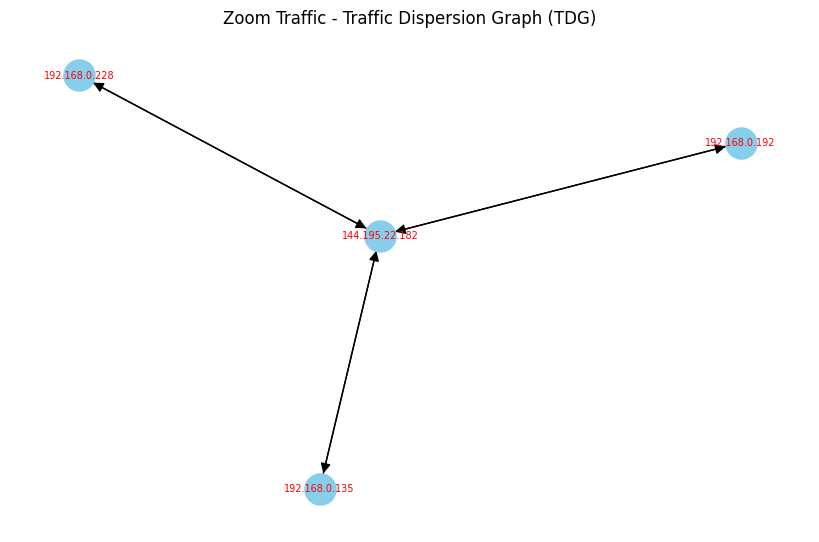

In [31]:
df1 = pd.read_csv('Data/Zoom1.csv', usecols=['Source', 'Destination'])
df2 = pd.read_csv('Data/Zoom2.csv', usecols=['Source', 'Destination'])
df3 = pd.read_csv('Data/Zoom3.csv', usecols=['Source', 'Destination'])

# Concatenate the DataFrames vertically (along the rows)
df = pd.concat([df1, df2, df3], ignore_index=True)

G = nx.DiGraph()

# Add edges to the graph based on source IP, destination IP, source port, and destination port
for index, row in df.iterrows():
    source_ip = row['Source']
    dest_ip = row['Destination']
    G.add_edge(f'{source_ip}', f'{dest_ip}')

# Draw the Traffic Dispersion Graph

plt.figure(figsize=(8, 5))  # Set the figure size (increased)
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, font_color='red', font_size=7, node_size=500, node_color='skyblue', arrows=True, arrowsize=15)
plt.title('Zoom Traffic - Traffic Dispersion Graph (TDG)')
plt.axis('off')
plt.show()


### Game Streaming - TeamFight Tactics

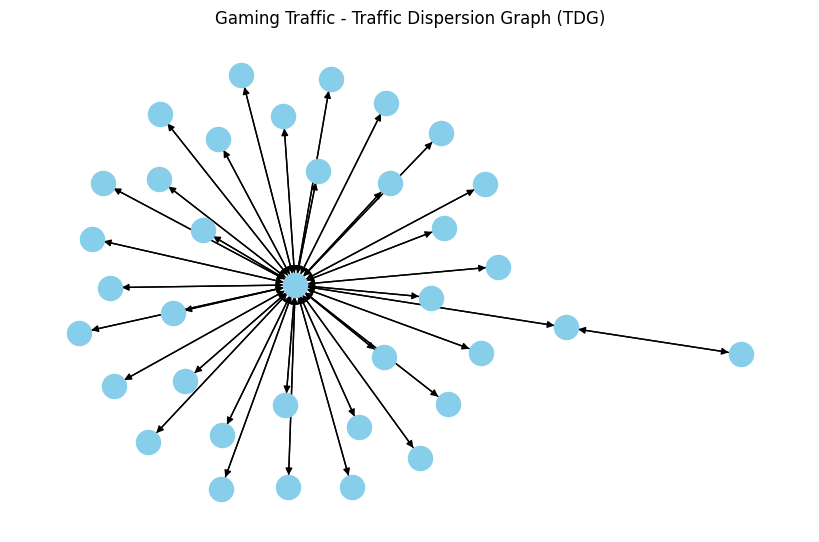

In [73]:
df = pd.read_csv('Data/Teamfight_Tactics_1.csv')
#df = pd.read_csv('Data/UvT_Openwifi.csv', encoding='ISO-8859-1')
G = nx.DiGraph()
for index, row in df.iterrows():
    source_ip = row['Source']
    dest_ip = row['Destination']
    G.add_edge(f'{source_ip}', f'{dest_ip}')

degree_threshold = 100  # Set this based on your dataset
high_degree_nodes = [node for node, degree in G.degree() if degree > degree_threshold]

# Draw the graph
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, font_color='red',node_size=300, node_color='skyblue', arrows=True)

# Annotate only the high-degree nodes with their IP addresses
for node in high_degree_nodes:
    plt.annotate(node, 
                 xy=pos[node], 
                 xytext=(-7, 7), 
                 textcoords='offset points',
                 horizontalalignment='right',
                 verticalalignment='bottom',
                 color='red')

plt.title('Gaming Traffic - Traffic Dispersion Graph (TDG)')
plt.axis('off')
plt.show()

### Port Scan Attack

### Scanning selected port ( nmap -p 80,443,135,199 192.168.0.228 )

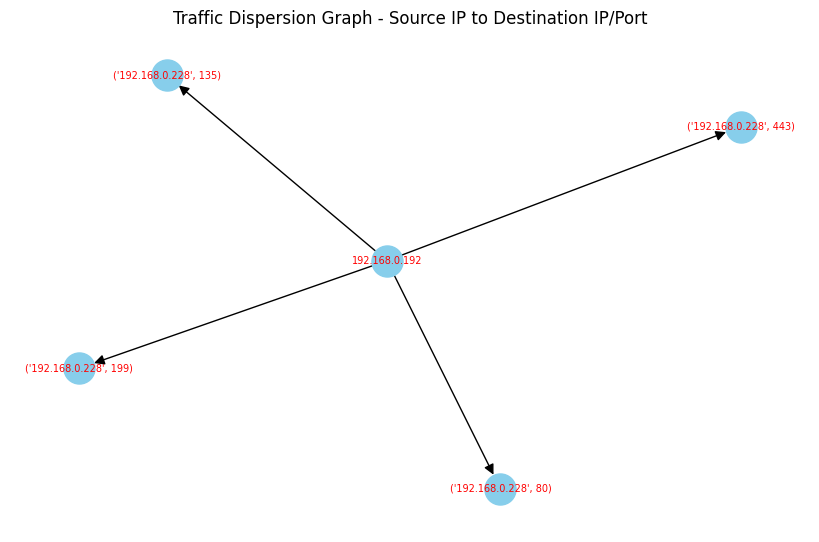

In [32]:

df = pd.read_csv('Data/selectedPorts.csv')
G = nx.DiGraph()

# Extract source IP addresses, source ports, destination IP addresses, and destination ports from the filtered packets
source_ips = df['Source']
source_ports = df['Source Port']
destination_ips = df['Destination']
destination_ports = df['Destination Port']

# Add edges to the graph based on the traffic data (edge from source IP/port to destination IP/port)
for source_ip, source_port, dest_ip, dest_port in zip(source_ips, source_ports, destination_ips, destination_ports):
    # Create a unique edge label combining source IP/port and destination IP/port
    #edge_label = f"{source_ip}/{source_port} to {dest_ip}/{dest_port}"
    G.add_edge((source_ip), (dest_ip, dest_port))

# Plot the graph
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, font_color='red',node_size=500, node_color='skyblue', font_size=7, arrowsize=15)
plt.title('Traffic Dispersion Graph - Source IP to Destination IP/Port')
plt.show()

### Full port scan

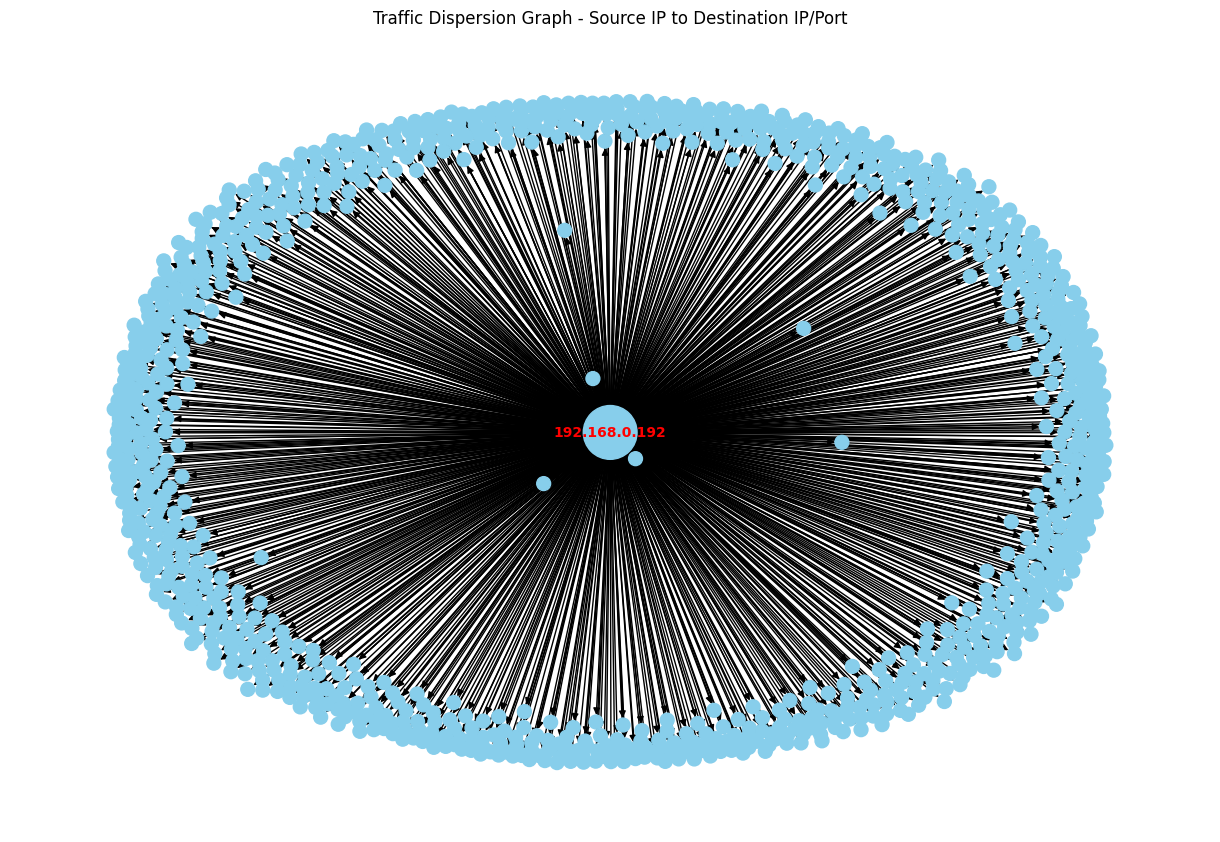

In [35]:
df = pd.read_csv('Data/portScan.csv')

G = nx.DiGraph()

source_ips = df['Source']
source_ports = df['Source Port']
destination_ips = df['Destination']
destination_ports = df['Destination Port']

for source_ip, source_port, dest_ip, dest_port in zip(source_ips, source_ports, destination_ips, destination_ports):
    G.add_edge(source_ip, (dest_ip, dest_port))

# Determine nodes with more than 500 outgoing edges
large_outgoing_nodes = [node for node, degree in G.out_degree() if degree > 500]

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes with larger size and display IP address as node label for large outgoing nodes
node_sizes = [1500 if node in large_outgoing_nodes else 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=10)

# Add node labels for large outgoing nodes
node_labels = {node: node.split('/')[0] for node, degree in G.out_degree() if degree > 500}  # Display only if outdegree > 500
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='red', font_size=10,  font_weight='bold')


plt.title('Traffic Dispersion Graph - Source IP to Destination IP/Port')
plt.show()

### Whole traffic

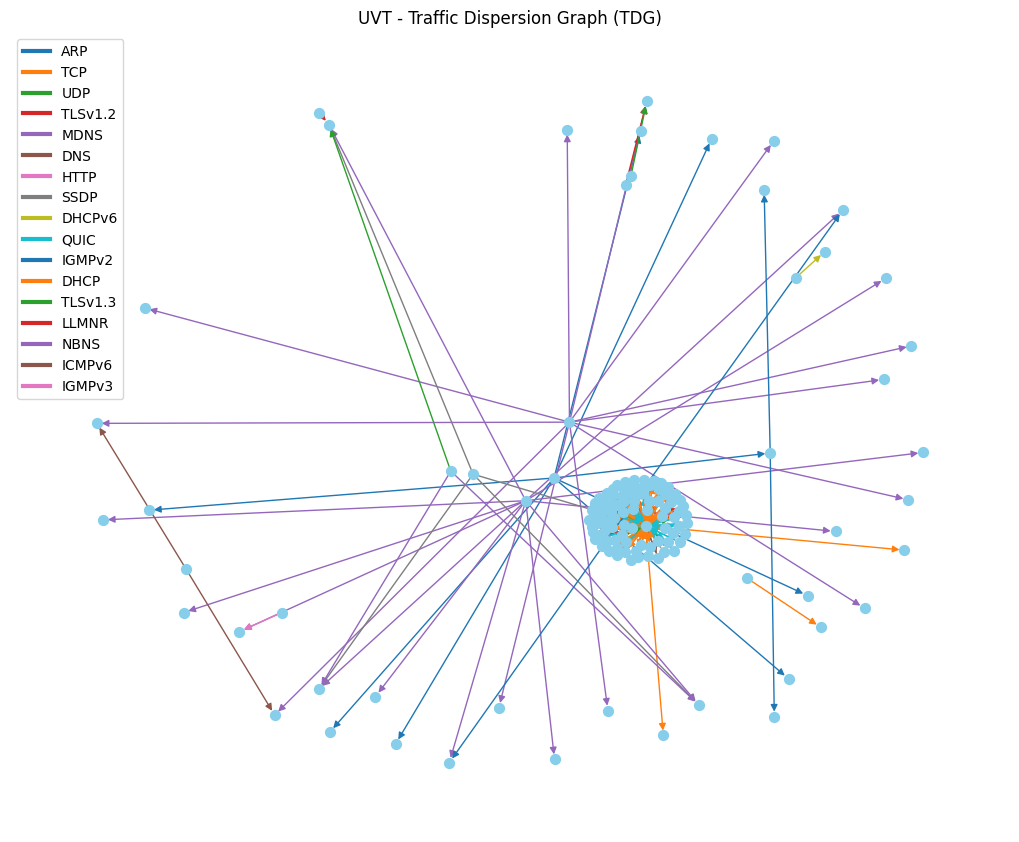

In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Load the CSV file
df = pd.read_csv('Data/UvT_Openwifi.csv', encoding='ISO-8859-1')

# Get all distinct protocols from the 'Protocol' column
distinct_protocols = df['Protocol'].unique()

# Generate a list of distinct colors for each protocol
protocol_colors = plt.cm.tab10.colors  # Using the 'tab10' colormap for distinct colors
protocol_color_map = dict(zip(distinct_protocols, itertools.cycle(protocol_colors)))

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on source IP, destination IP, source port, and destination port
for index, row in df.iterrows():
    source_ip = row['Destination']
    dest_ip = row['Source']
    protocol = row['Protocol']
    G.add_edge(source_ip, dest_ip, protocol=protocol)

plt.figure(figsize=(10, 8))

pos = nx.spring_layout(G)

# Draw edges with different colors based on protocols
edge_colors = [protocol_color_map[G.edges[edge]['protocol']] for edge in G.edges()]
nx.draw(G, pos, with_labels=False, font_color='red', font_size=8, node_size=50, node_color='skyblue', arrows=True, arrowsize=10, edge_color=edge_colors)

# Draw legend for the protocol colors
for protocol, color in protocol_color_map.items():
    plt.plot([], [], color=color, label=protocol, linewidth=3)

plt.legend()
plt.title('UVT - Traffic Dispersion Graph (TDG)')
plt.axis('off')
plt.show()


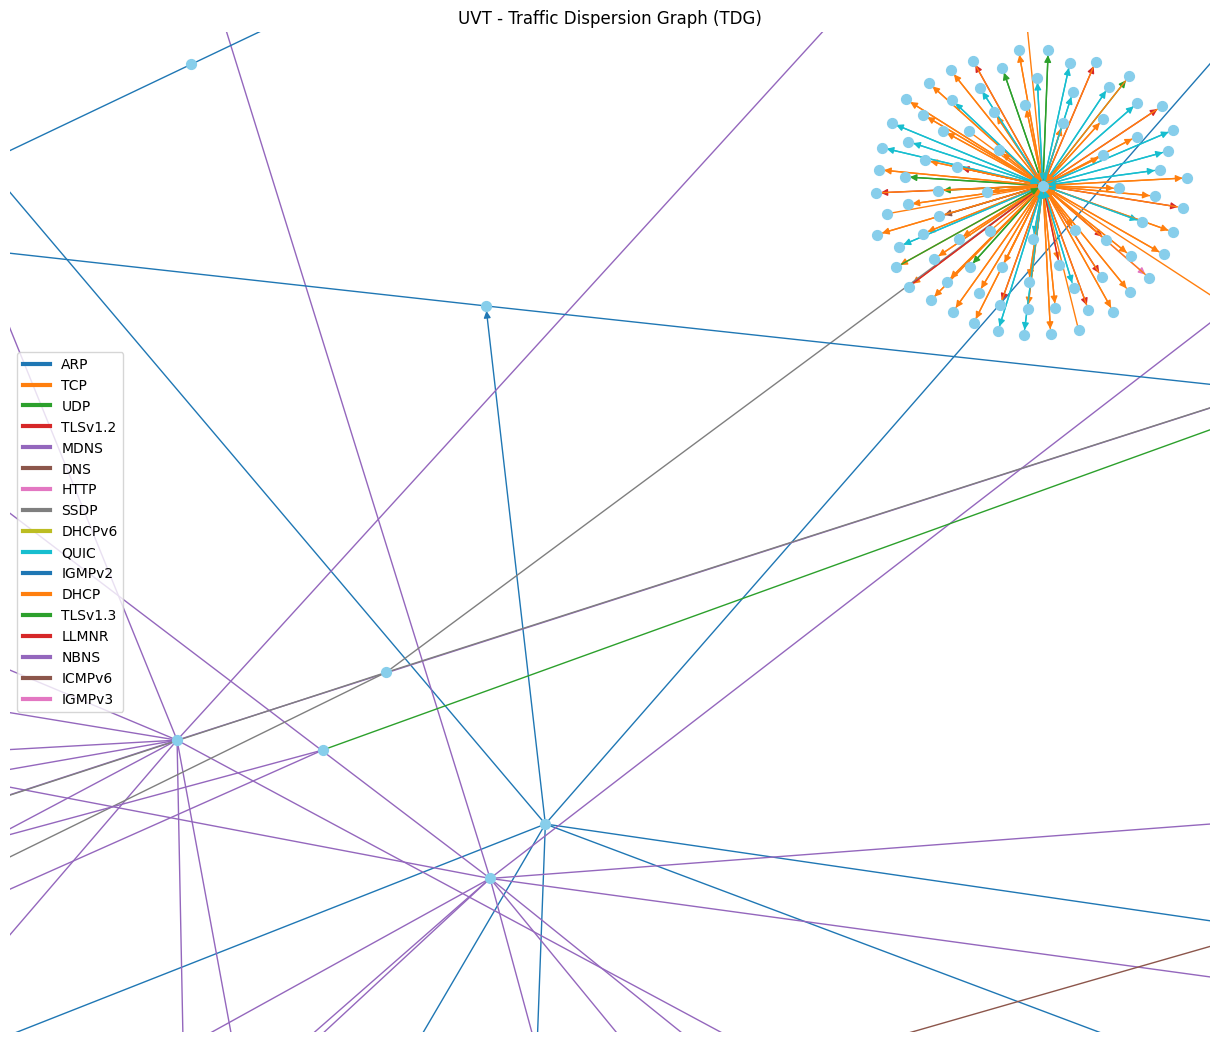

In [70]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Load the CSV file
df = pd.read_csv('Data/UvT_Openwifi.csv', encoding='ISO-8859-1')

# Get all distinct protocols from the 'Protocol' column
distinct_protocols = df['Protocol'].unique()

# Generate a list of distinct colors for each protocol
protocol_colors = plt.cm.tab10.colors  # Using the 'tab10' colormap for distinct colors
protocol_color_map = dict(zip(distinct_protocols, itertools.cycle(protocol_colors)))

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph based on source IP, destination IP, source port, and destination port
for index, row in df.iterrows():
    source_ip = row['Destination']
    dest_ip = row['Source']
    protocol = row['Protocol']
    G.add_edge(source_ip, dest_ip, protocol=protocol)

plt.figure(figsize=(12, 10))

# Set the position using the spring layout algorithm
pos = nx.spring_layout(G)

# Draw edges with different colors based on protocols
edge_colors = [protocol_color_map[G.edges[edge]['protocol']] for edge in G.edges()]
nx.draw(G, pos, with_labels=False, font_color='red', font_size=8, node_size=50, node_color='skyblue', arrows=True, arrowsize=10, edge_color=edge_colors)

# Draw legend for the protocol colors
for protocol, color in protocol_color_map.items():
    plt.plot([], [], color=color, label=protocol, linewidth=3)

plt.legend()
plt.title('UVT - Traffic Dispersion Graph (TDG)')

# Zoom in on a specific cluster (e.g., nodes with high degree)
# Replace 'cluster_nodes' with the nodes you want to zoom in on
cluster_nodes = [node for node, degree in dict(G.degree()).items() if degree > 5]  # Example: Nodes with degree > 5
plt.xlim(min(pos[node][0] for node in cluster_nodes) - 0.1, max(pos[node][0] for node in cluster_nodes) + 0.1)
plt.ylim(min(pos[node][1] for node in cluster_nodes) - 0.1, max(pos[node][1] for node in cluster_nodes) + 0.1)

plt.axis('off')
plt.show()
